##Project Overview

This was done as apart of the DSC-140S Course at the University of Mount Union in the fall of 2024. This was analysis that had some parameters but was mostly exploritory.

If there are any question, please view the README.md for contact information.

In [ ]:
#Imports

import requests
import pandas as pd
#import matplotlib as plt
import scipy
import matplotlib.pyplot as plt

# I had issues with matplotlib half way through the project so I searched for solutions and found this forumn post:
# https://stackoverflow.com/questions/75491344/attributeerror-module-matplotlib-has-no-attribute-bar

# Question 1

In [ ]:
#API Overview

base_url = "https://pokeapi.co/api/v2/"
mods = "type/fairy"
url = base_url+mods
js_data = requests.get(url).json()
data = [pokemon["pokemon"]["name"]for pokemon in js_data["pokemon"]]
type_data_fairy = pd.DataFrame(data, columns=["Name"])

type_data_fairy

,Name
0,clefairy
1,clefable
2,jigglypuff
3,wigglytuff
4,mr-mime
...,...
78,zacian-crowned
79,hatterene-gmax
80,grimmsnarl-gmax
81,alcremie-gmax


In [ ]:
#API Overview


ase_url = "https://pokeapi.co/api/v2/"
mods = "type/fire"
url = base_url+mods
js_data = requests.get(url).json()
data = [pokemon["pokemon"]["name"]for pokemon in js_data["pokemon"]]
type_data_fire = pd.DataFrame(data, columns=["Name"])

type_data_fire

,Name
0,charmander
1,charmeleon
2,charizard
3,vulpix
4,ninetales
...,...
98,growlithe-hisui
99,arcanine-hisui
100,typhlosion-hisui
101,tauros-paldea-blaze-breed


In [ ]:
#API Overview


base_url = "https://pokeapi.co/api/v2/"
mods = "pokemon/mr-mime"
url = base_url+mods
js_data = requests.get(url).json()
data = [js_data["name"], js_data["base_experience"], js_data["height"], js_data["weight"]]
pokemon_data = pd.DataFrame([data], columns=["Name", "Base_Experience", "Height", "Weight"])
pokemon_data

,Name,Base_Experience,Height,Weight
0,mr-mime,161,13,545


# Question 2

In [2]:
base_url = "https://pokeapi.co/api/v2/"
mods = "type/fairy"
url = base_url + mods
js_data = requests.get(url).json()
fairy_pokemon = [pokemon["pokemon"]["name"] for pokemon in js_data["pokemon"]]

pokemon_stats = []

for name in fairy_pokemon:
    mods = "pokemon/" + name
    url = base_url + mods
    js_data = requests.get(url).json()
    data = [js_data["name"], js_data["base_experience"], js_data["height"], js_data["weight"]]
    pokemon_stats.append(data)
    
pokemon_fairy_data = pd.DataFrame(pokemon_stats, columns=["Name", "Base_Experience", "Height", "Weight"])
print(pokemon_fairy_data)

                Name  Base_Experience  Height  Weight
0           clefairy              113       6      75
1           clefable              242      13     400
2         jigglypuff               95       5      55
3         wigglytuff              218      10     120
4            mr-mime              161      13     545
..               ...              ...     ...     ...
78    zacian-crowned              360      28    3550
79    hatterene-gmax              255     260   10000
80   grimmsnarl-gmax              255     320   10000
81     alcremie-gmax              173     300   10000
82  enamorus-therian              116      16     480

[83 rows x 4 columns]


In [3]:
base_url = "https://pokeapi.co/api/v2/"
mods = "type/fire"
url = base_url + mods
js_data = requests.get(url).json()
fire_pokemon = [pokemon["pokemon"]["name"] for pokemon in js_data["pokemon"]]

pokemon_stats = []

for name in fire_pokemon:
    mods = "pokemon/" + name
    url = base_url + mods
    js_data = requests.get(url).json()
    data = [js_data["name"], js_data["base_experience"], js_data["height"], js_data["weight"]]
    pokemon_stats.append(data)

pokemon_fire_data = pd.DataFrame(pokemon_stats, columns=["Name", "Base_Experience", "Height", "Weight"])
print(pokemon_fire_data)

                          Name  Base_Experience  Height  Weight
0                   charmander               62       6      85
1                   charmeleon              142      11     190
2                    charizard              267      17     905
3                       vulpix               60       6      99
4                    ninetales              177      11     199
..                         ...              ...     ...     ...
98             growlithe-hisui               70       8     227
99              arcanine-hisui              194      20    1680
100           typhlosion-hisui              240      16     698
101  tauros-paldea-blaze-breed              172      14     850
102   ogerpon-hearthflame-mask              275      12     398

[103 rows x 4 columns]


For the two lines of code, I used a for loop to grab the data for each name of a pokemon that showed up in the initial dataframe. I apended this data to a empty list and turned it into a dataframe.

# Question 3

In [32]:
pokemon_fairy_data["Base_Experience"].mean()

178.63855421686748

In [33]:
pokemon_fire_data["Base_Experience"].mean()


178.25242718446603

In [34]:
pokemon_fairy_data["Weight"].mean()

625.8795180722891

In [35]:
pokemon_fire_data["Weight"].mean()

1170.0

# Question 3 Explaination

Fairy Pokemon have a higher average base experience by not very much

Fairy Pokemon on average are lighter than fire pokemon

I got this data by using the template df[""].mean()

# Question 4

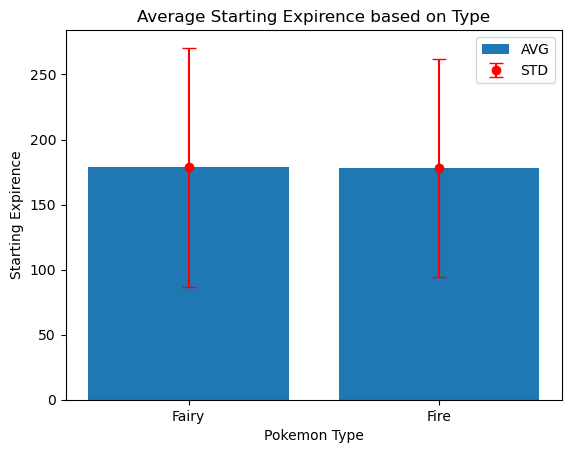

In [ ]:
# Data for base experience graphed on a bar chart

fairy_std = pokemon_fairy_data["Base_Experience"].std()
#print(fairy_std)
fire_std = pokemon_fire_data["Base_Experience"].std()
#print(fire_std)


x = ["Fairy", "Fire"]
y = [178.63855421686748,178.25242718446603]
error_bars = [fairy_std, fire_std]

plt.bar(x,y, label="AVG")
plt.errorbar(x,y,error_bars, fmt="o", capsize=5, color="red", label="STD")
plt.title("Average Starting Expirence based on Type")
plt.xlabel("Pokemon Type")
plt.ylabel("Starting Expirence")
plt.legend()

# Question 4 Explaination

Since both have nearly identical starting expirience, they both will have similar looking bar graphs. If you want to more accuratly visualize the data, you would want to change the amount the Y-axis increases by.

# Question 5

In [ ]:
#Correlation score for Fire Pokemon

corr = scipy.stats.pearsonr(pokemon_fire_data["Base_Experience"],pokemon_fire_data["Weight"])
print ("The correlation score is", corr[0])

The correlation score is 0.4070278151940698


In [ ]:
#Correlation Score for Fairy Pokemon

corr = scipy.stats.pearsonr(pokemon_fairy_data["Base_Experience"],pokemon_fairy_data["Weight"])
print ("The correlation score is", corr[0])

The correlation score is 0.22751799055143243


LinregressResult(slope=10.824751813933055, intercept=-759.5382845030185, rvalue=0.40702781519406983, pvalue=1.9835951526564856e-05, stderr=2.417139272263129, intercept_stderr=475.42363488288447)


Text(0, 0.5, 'Base Exp.')

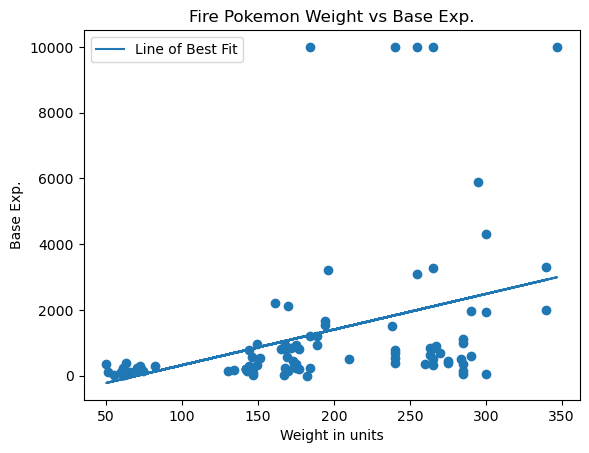

In [39]:
linear_model = scipy.stats.linregress(pokemon_fire_data["Base_Experience"], pokemon_fire_data["Weight"])
print (linear_model)
slope = linear_model.slope
y_intercept = linear_model.intercept

linear_fit = slope*pokemon_fire_data["Base_Experience"]+y_intercept

plt.scatter(pokemon_fire_data["Base_Experience"], pokemon_fire_data["Weight"])
plt.plot(pokemon_fire_data["Base_Experience"],linear_fit, label="Line of Best Fit")
plt.legend()
plt.title("Fire Pokemon Weight vs Base Exp.")
plt.xlabel("Weight in units")
plt.ylabel("Base Exp.")


LinregressResult(slope=4.678727013803104, intercept=-209.92151124889915, rvalue=0.22751799055143243, pvalue=0.038586901983736765, stderr=2.224987490092617, intercept_stderr=446.4522857722255)


Text(0, 0.5, 'Base Exp.')

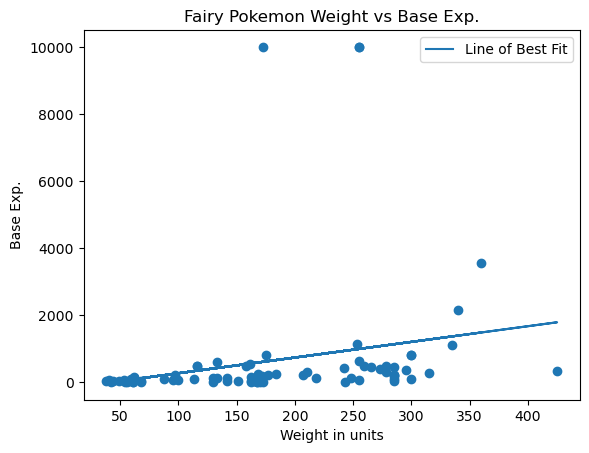

In [40]:
linear_model = scipy.stats.linregress(pokemon_fairy_data["Base_Experience"], pokemon_fairy_data["Weight"])
print (linear_model)
slope = linear_model.slope
y_intercept = linear_model.intercept

linear_fit = slope*pokemon_fairy_data["Base_Experience"]+y_intercept

plt.scatter(pokemon_fairy_data["Base_Experience"], pokemon_fairy_data["Weight"])
plt.plot(pokemon_fairy_data["Base_Experience"],linear_fit, label="Line of Best Fit")
plt.legend()
plt.title("Fairy Pokemon Weight vs Base Exp.")
plt.xlabel("Weight in units")
plt.ylabel("Base Exp.")

# Question 5 Explaination

For both types of pokemon, Weight and Base Exp. have a week positive correlation. This is enforced by the line of best fit seen in both graphs alongside the pearson correlation scores seen above.

I did this by generating a pearson correlation score for each dataframe of pokemon and then I did a scatter plot of data and graphed the line of best fit over it.